# Proyek Analisis Data: Bike Sharing Dataset
- Kelompok : TensorFlow
- Anggota : </br>
10122108 - Rava Radithya Razan</br>
10122110 - Apriana Cahya Bowo Setiadi </br>
10122111 - Rizky Aditya Friatna </br>
10122083 - Ninandya Nuraini Assyifa Gunandi</br>
10122106 - Zaidan Abdul Aziz</br>
10122089 - Reyva Noor Fauzan Gunawan



## Menentukan Pertanyaan Bisnis



-  Kapan jam-jam sibuk untuk penyewaan sepeda pada hari kerja dan akhir pekan dan bagaimana data ini dapat menginformasikan jadwal staf dan pemeliharaan? - 10122108 - Rava Radithya Razan
- Apakah temperatur cuaca mempengaruhi orang orang dalam menyewa sepeda? - 10122110 - Apriana Cahya Bowo Setiadi
- Bagaimana bentuk trend rental sepeda pada tahun 2011? - 10122111 - Rizky Aditya Friatna
- Berapa perbandingan anggota casual dan anggota registered pada tahun 2011? 10122083 - Ninandya Nuraini Assyifa Gunandi
- Apakah pada setiap musim memengaruhi penjumlahan penyewa sepeda? 10122106 - Zaidan Abdul Aziz
- Faktor apakah yang paling berpengaruh terhadap rental sepeda ? - 10122108 - Rava Radithya Razan
- pada musim apa sepeda sering disewakan ketika hujan oleh para penyewa? dan bagaimana data ini akan membantu untuk mengelola pemeliharaan sepeda ?  10122089 - Reyva Noor Fauzan Gunawan
- Apakah ada pengaruh cuaca terhadap jumlah peminjaman sepeda? - 10122110 - Apriana Cahya Bowo Setiadi


## Menyiapkan semua library yang dibutuhkan

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Menyiapkan data-data yang akan dipakai untuk proses analisis data. Dalam proyek data ini data yang akan dipakai adalah 'Bike Sharing Dataset', lebih tepatnya 'day.csv' dan 'hour.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
day_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')
hour_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hour.csv')

In [ ]:
print('Day Data Head: ')
print(day_data.head(),"\n")
print('Hour Data Head: ')
print(hour_data.head())

Day Data Head: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Hour Dat

### Assessing Data
Pada tahap ini, data akan di identifikasi apakah terdapat masalah di dalam nya seperti missing values, incosistent values, outliers, duplicate data, invalid values, dan innacurate value. Selain itu, disini data akan dipastikan kualitas nya dan akan ditampilkan rangkuman statistik nya.

In [ ]:
day_summary = day_data.describe()
day_missing_values = day_data.isnull().sum()

hour_summary = hour_data.describe()
hour_missing_values = hour_data.isnull().sum()

In [ ]:
print('Day Data Summary: ')
print(day_summary,"\n")
print('Day Data Missing Values: ')
print(day_missing_values,"\n")

print('Hour Data Summary: ')
print(hour_summary,"\n")
print('Hour Data Missing Values: ')
print(hour_missing_values,"\n")

Day Data Summary: 
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std     

### Cleaning Data
Dikarenakan tidak terdapat hal yang harus dibersihkan dari dataset diatas, maka tahap cleaning data tidak perlu dilakukan.

## Exploratory Data Analysis (EDA)
Di tahap ini data akan melewati proses analisis untuk mencari pola yang bersangkutan dengan musim dan cuaca, lalu menganalisis distribusi rental sepeda dalam jam-jam yang berbeda dalam 1 hari.

### Explore ...

In [ ]:
seasonality = day_data.groupby('season')['cnt'].sum().reset_index().replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
weather = day_data.groupby('weathersit')['cnt'].sum().reset_index().replace([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', "Heavy Rain/Ice Pellets"])

In [ ]:
hour_data['is_weekend'] = hour_data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)
peak_hours_weekday = hour_data[hour_data['is_weekend'] == 0].groupby('hr')['cnt'].mean().reset_index()
peak_hours_weekend = hour_data[hour_data['is_weekend'] == 1].groupby('hr')['cnt'].mean().reset_index()

In [ ]:
print('Seasonality: ')
print(seasonality,"\n")
print('Weather: ')
print(weather,"\n")
print('Peak Hours weekday: ')
print(peak_hours_weekday,"\n")
print('Peak Hours weekend: ')
print(peak_hours_weekend,"\n")

Seasonality: 
   season      cnt
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613 

Weather: 
   weathersit      cnt
0       Clear  2257952
1        Mist   996858
2  Light Snow    37869 

Peak Hours weekday: 
    hr         cnt
0    0   37.626692
1    1   17.464078
2    2    9.377953
3    3    5.188525
4    4    5.446939
5    5   24.331395
6    6   99.485493
7    7  282.145068
8    8  464.557060
9    9  238.661509
10  10  138.133462
11  11  161.897485
12  12  204.320463
13  13  202.479769
14  14  187.728324
15  15  203.913295
16  16  292.280769
17  17  515.915385
18  18  483.184971
19  19  343.277457
20  20  246.815029
21  21  184.620424
22  22  137.194605
23  23   87.462428 

Peak Hours weekend: 
    hr         cnt
0    0   94.148325
1    1   72.583732
2    2   55.980676
3    3   26.995215
4    4    8.497585
5    5    8.487562
6    6   17.778846
7    7   39.533333
8    8   99.166667
9    9  171.666667
10  10  261.152381
11  11  321.995238
12  12  374.171429


In [ ]:
day_temp = day_data['temp']
day_cnt = day_data['cnt']
day_temp_celcius = day_temp * 41
day_temp_cnt = pd.concat([day_temp_celcius,day_cnt], axis=1)
print(day_temp_cnt)

          temp   cnt
0    14.110847   985
1    14.902598   801
2     8.050924  1349
3     8.200000  1562
4     9.305237  1600
..         ...   ...
726  10.420847  2114
727  10.386653  3095
728  10.386653  1341
729  10.489153  1796
730   8.849153  2729

[731 rows x 2 columns]


In [ ]:
# Menghitung nilai korelasi untuk data perjam menggunakan corr()
print('Correlation Matrix for Hourly Data:')
correlation_matrix_hour = hour_data.corr()
print(correlation_matrix_hour)

Correlation Matrix for Hourly Data:
             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
wi

<ipython-input-11-03417b14c7a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_hour = hour_data.corr()


In [ ]:
# Membaca dataset bike sharing
data = pd.read_csv('/content/drive/MyDrive/day.csv')
data['dteday'] = pd.to_datetime(data['dteday'])

# Menambahkan kolom baru untuk tahun
data['year'] = data['dteday'].dt.year

# Filter data untuk tahun 2011
data_2011 = data[data['year'] == 2011]

# Menghitung jumlah anggota registered pada tahun 2011
jumlah_registered_2011 = data_2011['registered'].sum()
jumlah_casual_2011 = data_2011['casual'].sum()


# Menampilkan jumlah anggota registered pada tahun 2011
print("Jumlah anggota registered pada tahun 2011:", jumlah_registered_2011)
print("Jumlah anggota casual pada tahun 2011:", jumlah_casual_2011)

# Menghitung dan menampilkan perbandingan
perbandingan = jumlah_registered_2011 - jumlah_casual_2011
print("Perbandingan anggota registered dan casual pada tahun 2011 :", perbandingan)

Type = ['Registered', 'casual']
jumlah =[jumlah_registered_2011,jumlah_casual_2011]



df_registered_casual = pd.DataFrame({'Type' : Type, 'Total' : jumlah})

print("Data anggota registered dan casual pada tahun 2011")
display(df_registered_casual)
display(df_registered_casual.dtypes)

Jumlah anggota registered pada tahun 2011: 995851
Jumlah anggota casual pada tahun 2011: 247252
Perbandingan anggota registered dan casual pada tahun 2011 : 748599
Data anggota registered dan casual pada tahun 2011


,Type,Total
0,Registered,995851
1,casual,247252


Type     object
Total     int64
dtype: object

In [ ]:
# Mendapatkan Seluruh penyewa pada masing-masing musim
Jumlah_cnt_s1 = day_data.query("season == 1")['cnt'].sum()
Jumlah_cnt_s2 = day_data.query("season == 2")['cnt'].sum()
Jumlah_cnt_s3 = day_data.query("season == 3")['cnt'].sum()
Jumlah_cnt_s4 = day_data.query("season == 4")['cnt'].sum()

In [ ]:
musim = ['Spring','Summer','Fall','Winter']
total_setiap_musim = [Jumlah_cnt_s1,Jumlah_cnt_s2,Jumlah_cnt_s3,Jumlah_cnt_s4]

total = sum(total_setiap_musim)
persen_setiap_musim = []
for i in total_setiap_musim:
  persen_setiap_musim.append((i/total)*100)

df_Penyewa_Musim = pd.DataFrame({'Musim' : musim, 'Jumlah_Penyewa' : total_setiap_musim, 'Persen' : persen_setiap_musim})

print("Penyewa pada tahun 2011-2012")
display(df_Penyewa_Musim)
display(df_Penyewa_Musim.dtypes)



Penyewa pada tahun 2011-2012


,Musim,Jumlah_Penyewa,Persen
0,Spring,471348,14.315030
1,Summer,918589,27.897921
2,Fall,1061129,32.226919
3,Winter,841613,25.560129


Musim              object
Jumlah_Penyewa      int64
Persen            float64
dtype: object

In [ ]:
# Ubah kolom 'dteday' menjadi format datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Filter data untuk tahun 2011
day_data_2011 = day_data[day_data['yr'] == 0]
hour_data_2011 = hour_data[hour_data['yr'] == 0]

print(day_data['dteday'])
print(hour_data['dteday'])
print(day_data_2011)
print(hour_data_2011)

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]
0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]
     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...    

In [ ]:
rainy_days = day_data[(day_data["weathersit"] == 3) | (day_data["weathersit"] == 4)]
cyclists_per_season = rainy_days.groupby("season")["cnt"].sum()

display(rainy_days)
display(cyclists_per_season)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


season
1     3739
2     3507
3    11007
4    19616
Name: cnt, dtype: int64

In [ ]:
day_weathersit = day_data['weathersit']
day_cnt = day_data['cnt']
day_weathersit_cnt = pd.concat([day_weathersit,day_cnt], axis=1)
day_weathersit_cnt['weathersit'] = day_weathersit_cnt['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Snow','Heavy Rain'])
display(day_weathersit_cnt)
day_weathersit_cnt = day_weathersit_cnt.groupby('weathersit').sum()
display(day_weathersit_cnt)

,weathersit,cnt
0,Mist,985
1,Mist,801
2,Clear,1349
3,Clear,1562
4,Clear,1600
...,...,...
726,Mist,2114
727,Mist,3095
728,Mist,1341
729,Clear,1796


,cnt
weathersit,
Clear,2257952
Light Snow,37869
Mist,996858


## Visualization & Explanatory Analysis
Pada tahap ini, data yang telah melewati tahap Exploratory Data Analysis (EDA) akan dibuatkan visualisasi nya, dan visualisasi nya harus berdasarkan dari pertanyaan bisnis.

### Pertanyaan 1: Kapan jam-jam sibuk untuk penyewaan sepeda pada hari kerja dan akhir pekan, dan bagaimana data ini dapat menginformasikan jadwal staf dan pemeliharaan?

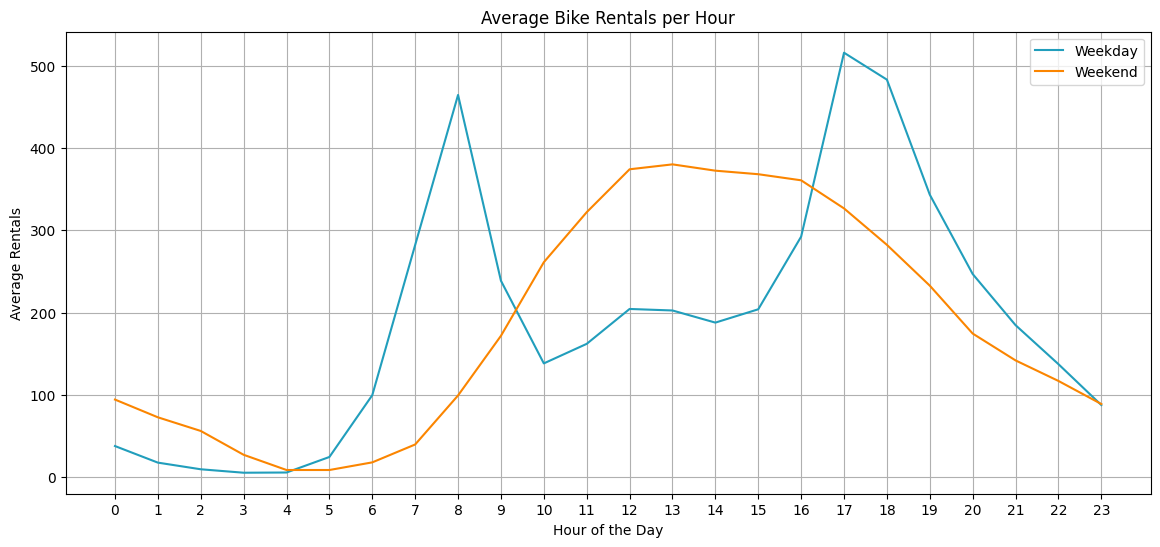

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(peak_hours_weekday['hr'], peak_hours_weekday['cnt'], label='Weekday', color='#219ebc')
plt.plot(peak_hours_weekend['hr'], peak_hours_weekend['cnt'], label='Weekend', color='#fb8500')
plt.title('Average Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 2: Apakah temperatur cuaca mempengaruhi orang orang dalam menyewa sepeda?

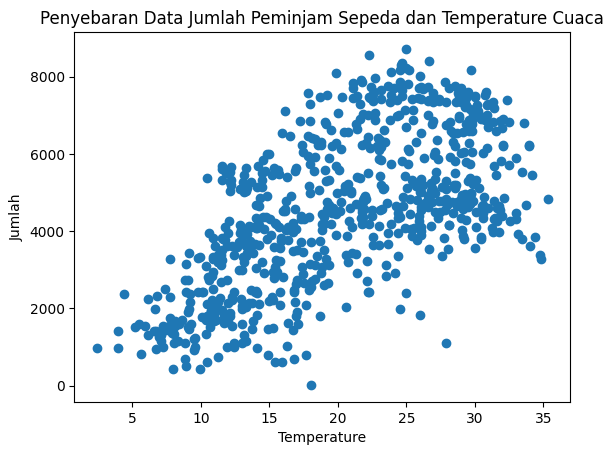

In [ ]:
plt.scatter(day_temp_cnt['temp'],day_temp_cnt['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Jumlah')
plt.title('Penyebaran Data Jumlah Peminjam Sepeda dan Temperature Cuaca')
plt.show()

### Pertanyaan 3: Berapa perbandingan anggota casual dan anggota registered pada tahun 2011?

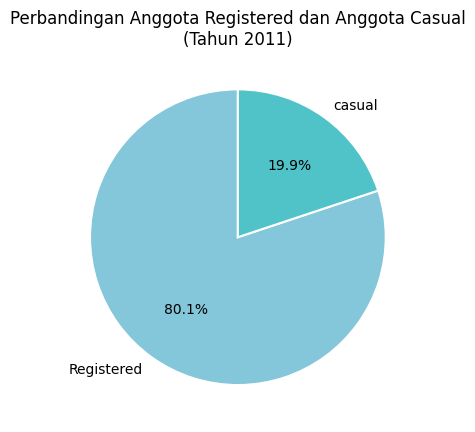

In [ ]:
# Membuat Pie Chart
plt.pie(
    df_registered_casual['Total'],
    labels=df_registered_casual['Type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#84c6da', '#50c3c9'],
    wedgeprops={"linewidth": 1.5, "edgecolor": "white"}
    )

# Menambahkan judul
plt.title('Perbandingan Anggota Registered dan Anggota Casual\n(Tahun 2011)')

# Show the chart
plt.show()

### Pertanyaan 4: Apakah pada setiap musim memengaruhi penjumlahan penyewa sepeda?

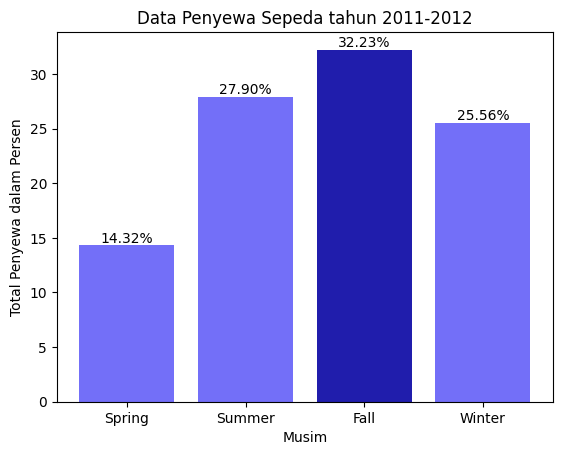

In [ ]:
warna = ['#736ff8','#736ff8','#201dac','#736ff8']

plt.bar(
    df_Penyewa_Musim['Musim'],
    df_Penyewa_Musim['Persen'],
    color = warna
)

for i, p in enumerate(df_Penyewa_Musim['Persen']):
  plt.text(i, p, f'{p:.2f}%', ha='center', va='bottom')

plt.xlabel("Musim")
plt.ylabel('Total Penyewa dalam Persen')
plt.title('Data Penyewa Sepeda tahun 2011-2012')

plt.show()

### Pertanyaan 5: Faktor apakah yang paling berpengaruh terhadap rental sepeda ?

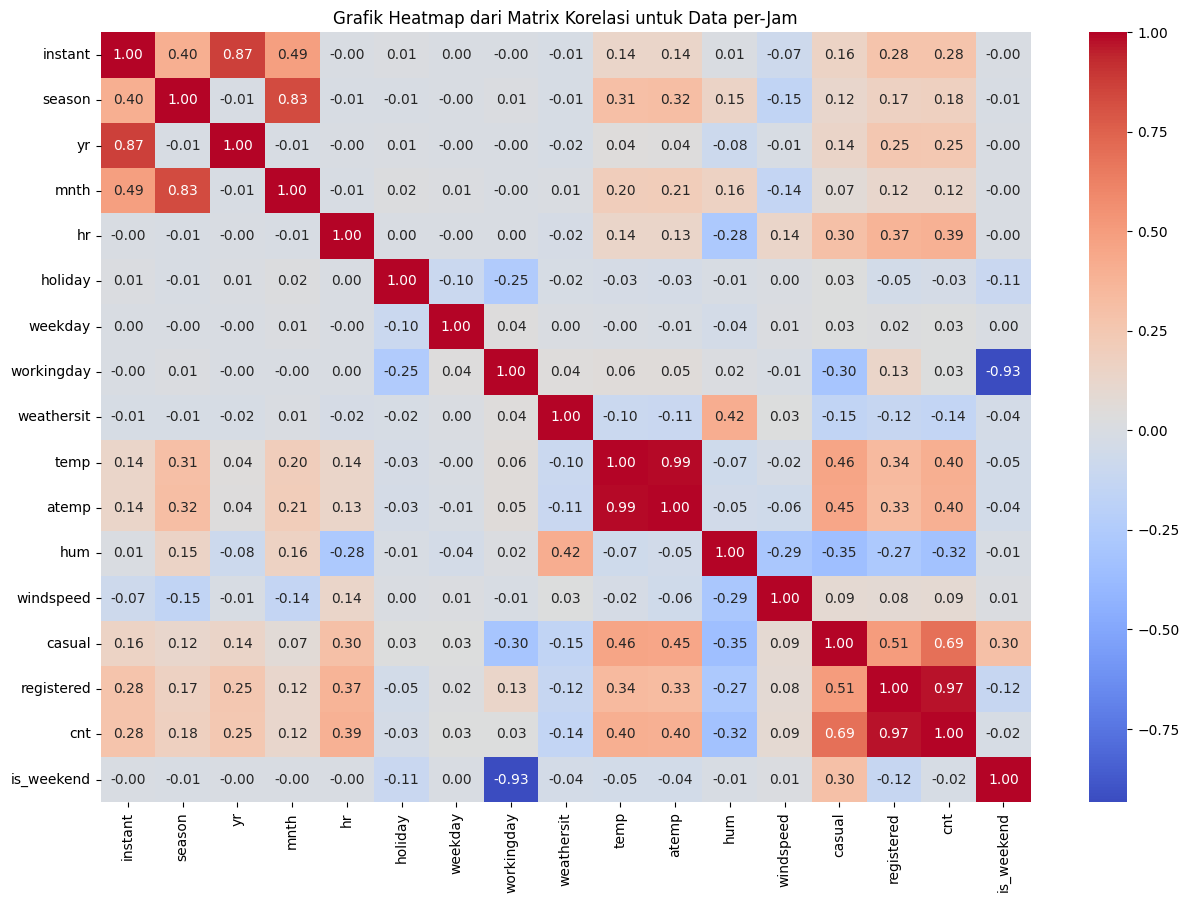

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix_hour, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Grafik Heatmap dari Matrix Korelasi untuk Data per-Jam')
plt.show()

### Pertanyaan 6: Bagaimana bentuk trend rental sepeda pada tahun 2011?

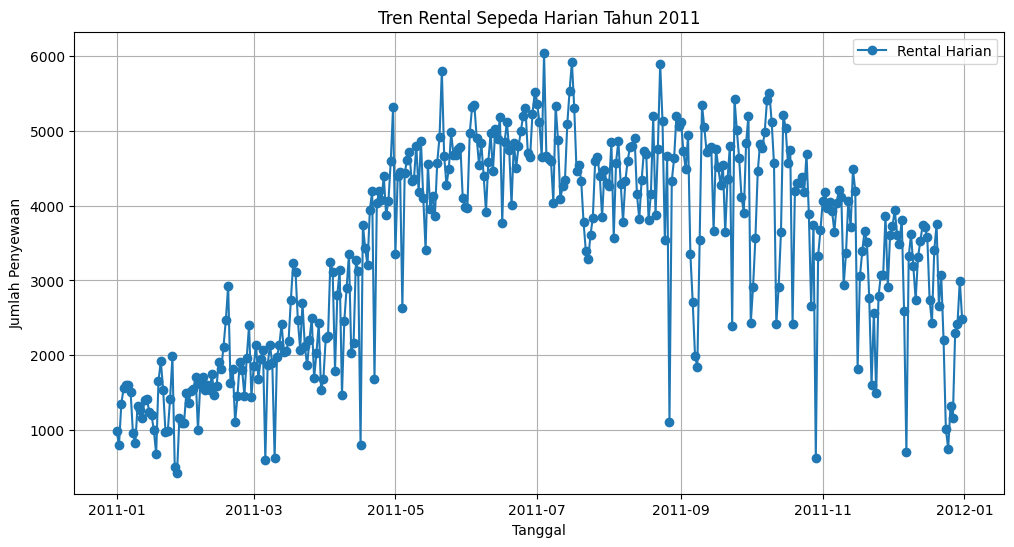

In [ ]:

# Membuat visualisasi untuk data harian
plt.figure(figsize=(12, 6))
plt.plot(day_data_2011['dteday'], day_data_2011['cnt'], label='Rental Harian', marker='o')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Rental Sepeda Harian Tahun 2011')
plt.legend()
plt.grid(True)
plt.show()

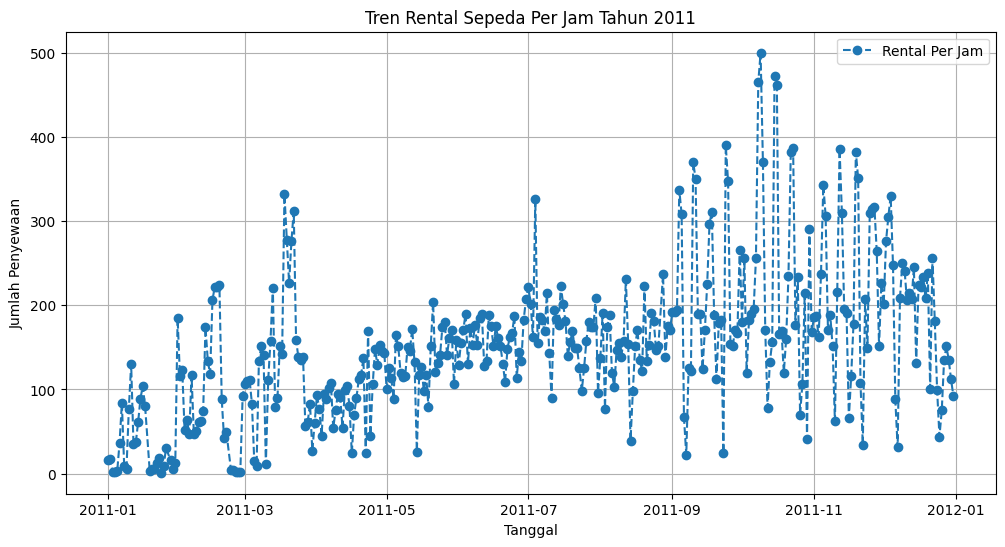

In [ ]:
# Membuat visualisasi untuk data per jam (ambil contoh jam 12:00 setiap harinya)
plt.figure(figsize=(12, 6))
plt.plot(hour_data_2011['dteday'][::24], hour_data_2011['cnt'][::24], label='Rental Per Jam', marker='o', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Rental Sepeda Per Jam Tahun 2011')
plt.legend()
plt.grid(True)
plt.show()

###Pertanyaan 7: pada musim apa sepeda sering disewakan ketika hujan oleh para penyewa? dan bagaimana data ini akan membantu untuk mengelola pemeliharaan sepeda

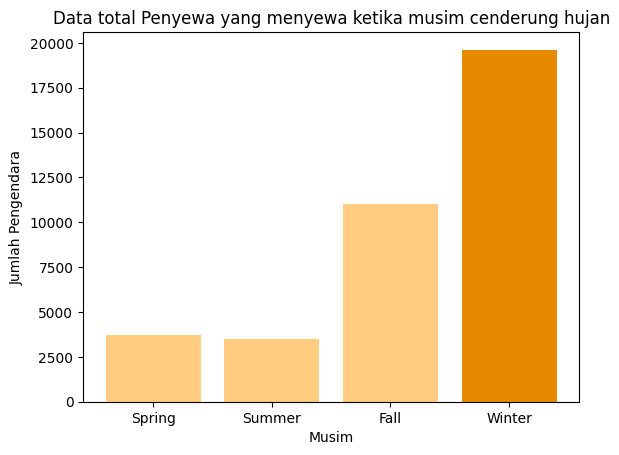

In [ ]:
seasons = ["Spring", "Summer", "Fall", "Winter"]
colors = ['#ffcc80' , '#ffcc80', '#ffcc80','#e68a00']
plt.bar(seasons, cyclists_per_season, color=colors)
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengendara")
plt.title("Data total Penyewa yang menyewa ketika musim cenderung hujan")
plt.show()

###Pertanyaan 8: Apakah ada pengaruh cuaca terhadap jumlah peminjaman sepeda?

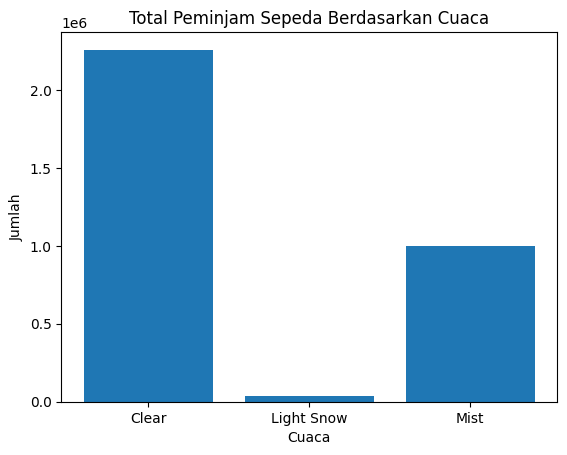

In [ ]:
plt.bar(day_weathersit_cnt.index,day_weathersit_cnt['cnt'])
plt.xlabel('Cuaca')
plt.ylabel('Jumlah')
plt.title('Total Peminjam Sepeda Berdasarkan Cuaca')
plt.show()

# Conlusion:



1. Conclusion pertanyaan 1: <br>

> - Pada hari kerja, jam sibuk adalah sekitar pukul 8 pagi dan 5 sore, bertepatan dengan jam-jam perjalanan. Pada akhir pekan, polanya lebih tersebar dengan puncaknya di sore hari.
> -  Hal ini dapat menginformasikan bahwa, disaat sebelum dan sesudah jam sibuk saat weekend dan weekday, perlu diadakan nya pengecekan oleh staf pemeliharaan.

2. Conclusion pertanyaan 2: <br>

> - Berdasarkan hasil penyebaran data dapat disimpulkan bahwa Suhu cuaca berpengaruh terhadap orang yang akan menyewa sepeda karena semakin tinggi suhu, semakin tinggi pula jumlah orang yang menyewa sepeda.
> - Hal ini bisa menjadi persiapan bagi penyewa ketika suhu cuaca sedang normal maka harus dilakukan pengecekan semua sepeda agar bisa di sewakan sesuai dengan permintaan

3. Conclusion pertanyaan 3: <br>

> - Berdasarkan hasil data menunjukkan bahwa anggota casual dan anggota registered memiliki perbandingan, perbandingan jumlah Anggota Registered dan Anggota Casual adalah 748599.
> - Anggota registered lebih banyak dibandingkan anggota casual

4. Conclusion pertanyaan 4: <br>

> - Berdasarkan jumlah penyewa pada data, dapat disimpulkan bahwa pada setiap musim memengaruhi penjumlahan penyewa.
> - Diperlihatkan bahwa orang-orang menyukai menyewa sepeda pada Musim Gugur (Fall).
> - Musim Semi (Spring) merupakan penyewa paling sedikit dibandingkan dengan musim yang lainnya.

5. Conclusion pertanyaan 5: <br>

> - Visualisasi heatmap dari matriks korelasi data per jam menunjukkan beberapa hubungan yang kuat antar variabel. Misalnya, kemungkinan ada korelasi yang kuat antara jumlah penyewaan (cnt) dan faktor-faktor seperti jam dalam sehari (hr), suhu (temp), dan suhu udara (atemp).
> - Hal ini menunjukkan bahwa permintaan penyewaan sepeda dipengaruhi oleh waktu dan kondisi cuaca. Heatmap juga membantu mengidentifikasi dengan cepat variabel mana yang tidak memiliki hubungan yang kuat satu sama lain, seperti yang ditunjukkan oleh warna yang lebih dingin pada skala.

6. Conclusion pertanyaan 6: <br>

> - Tren Harian:
 * Jumlah penyewaan sepeda harian cenderung naik dan turun setiap hari.
 * Puncak penyewaan terjadi pada beberapa titik tertentu dalam tahun 2011, di mana permintaan paling tinggi.
> - Tren Per Jam:
 * Tren penyewaan sepeda per jam pada tahun 2011 menunjukkan pola harian yang konsisten.
 * Puncak penyewaan per jam cenderung terjadi pada jam-jam tertentu dalam sehari, dengan kemungkinan puncak pada jam-jam tertentu seperti jam sibuk sebelum atau setelah jam kerja.

7. Conclusion pertanyaan 7: <br>

> - berdasarkan data yang telah diberikan dapat dilihat bahwa ketika musim salju orang orang cenderung tetap menyewa sepeda walaupun sedang hujan/bersalju lebat.
> - sebanyak lebih dari 175K orang yang menyewa sepeda saat musim salju, total data ini lebih banyak daripada di musim musim lainnya
> - dengan data ini, perusahaan bisa mengelelola pengeluaran anggaran uang untuk pemeliharaan rutin sepeda yang disewakan

8. Conclusion pertanyaan 8: <br>

> - Berdasarkan visualisasi data yang telah diberikan bisa diambil kesimpulan bahwa Ada pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda, dimana kondisi cuaca yang paling banyak meminjam sepeda adalah Cerah
> - Sehingga kondisi cuaca ini bisa menjadi acuan kepada para penyewa sepeda untuk bisa menyiapkan sepedanya untuk siap disewakan